## Feature selection

Feature selection is highly impactful because
       
       - Higher number of feature can lead to model overfitting.
       - Effective for extracting non-relevent feature.
       - Reduce time and memory uses.

The data has been collected from dataset colloected from https://www.kaggle.com/mathchi/diabetes-data-set. The dataset contains 768 samples and 9 features. It is a binary classification dataset.

#### loading libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data_diabetes = pd.read_csv("diabetes.csv") 

In [3]:
data_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data_diabetes.shape

(768, 9)

In [5]:
X = data_diabetes.iloc[:,:-1]  #independent columns
y = data_diabetes.iloc[:,-1]    #target column 

## 1. Filter method

### 1.1 Univariate selection method

- Univariate selection method is based on the univariate statistical tests such as ANOVA, F-test.

- This method assume linear relationship between feature and target.

- The following feature selection method is based on Gaussian distribution. 


-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
SelectKBest and SelectPercentile is the two most popular methods for univariate selection method. 

------------------------------------------------------------------------------------------------------------------


#### 1.1.1 SelectKBest

This method select the features according to the best scores of K.

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
f_s_best_k=SelectKBest(score_func=chi2,k=5)
features_best_k = f_s_best_k.fit(X,y)


for i in range(len(features_best_k.scores_)):
	print('Feature %d: %f' % (i,features_best_k.scores_[i]))

Feature 0: 111.519691
Feature 1: 1411.887041
Feature 2: 17.605373
Feature 3: 53.108040
Feature 4: 2175.565273
Feature 5: 127.669343
Feature 6: 5.392682
Feature 7: 181.303689


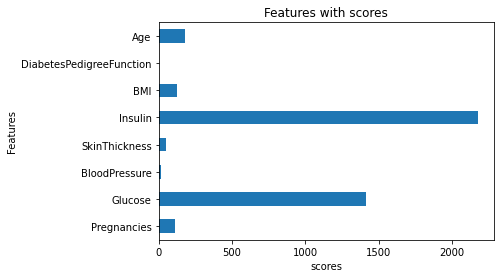

In [8]:
import matplotlib.pyplot as plt

features_ = data_diabetes.columns[0:8]
new_df = pd.Series(features_best_k.scores_, features_)
new_df.plot(kind = 'barh')
plt.ylabel("Features")
plt.xlabel("scores")
plt.title("Features with scores")
plt.show()

####  ***chi2 is effective for the classification tasks not for the regression tasks and sparse data.

#### 1.1.2 SelectPercentile

This method select the features according to the best Percentile scores

In [9]:
from sklearn.feature_selection import SelectPercentile, chi2

In [10]:
f_s_best_percentile=SelectPercentile(score_func=chi2,percentile=10)
features_p = f_s_best_percentile.fit(X,y)


for i in range(len(features_p.scores_)):
	print('Feature %d: %f' % (i,features_p.scores_[i]))

Feature 0: 111.519691
Feature 1: 1411.887041
Feature 2: 17.605373
Feature 3: 53.108040
Feature 4: 2175.565273
Feature 5: 127.669343
Feature 6: 5.392682
Feature 7: 181.303689


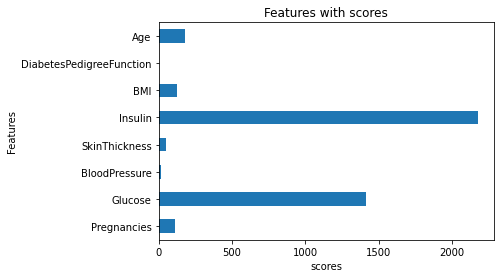

In [11]:
features = data_diabetes.columns[0:8]
new_df = pd.Series(features_p.scores_, features)
new_df.plot(kind = 'barh')
plt.ylabel("Features")
plt.xlabel("scores")
plt.title("Features with scores")
plt.show()

 ### 1.1.3 Information gain method

In this feature selection method features are selected according to the collected information from the feature.

[0.03261505 0.12180001 0.01077102 0.00792482 0.0447473  0.07345232
 0.01300251 0.05764731]


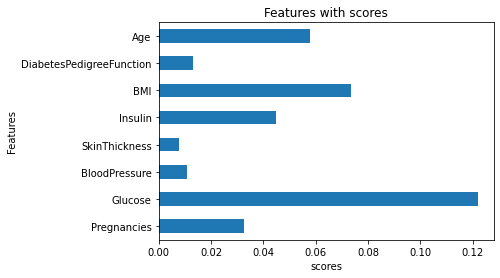

In [12]:
from sklearn.feature_selection import mutual_info_classif

scores = mutual_info_classif(X, y)
print(scores)

features = data_diabetes.columns[0:8]
new_df = pd.Series(scores, features)
new_df.plot(kind = 'barh')
plt.ylabel("Features")
plt.xlabel("scores")
plt.title("Features with scores")
plt.show()


- Mutual_info_classif is effective for descrete or continuous variable.

- Effective for classification problem.

- Find the dependency between to random non-negative value. Higher value means higher dependency.

- Based on entropy estimation.

### 1.2. ANOVA-f test

- Calculate ANOVA-f value for the selected samples.


In [13]:
from sklearn.feature_selection import f_classif

In [14]:
f_s_anova_f=SelectKBest(score_func=f_classif,k=4)
features_a_f = f_s_anova_f.fit(X,y)


for i in range(len(features_a_f.scores_)):
	print('Feature %d: %f' % (i,features_a_f.scores_[i]))

Feature 0: 39.670227
Feature 1: 213.161752
Feature 2: 3.256950
Feature 3: 4.304381
Feature 4: 13.281108
Feature 5: 71.772072
Feature 6: 23.871300
Feature 7: 46.140611


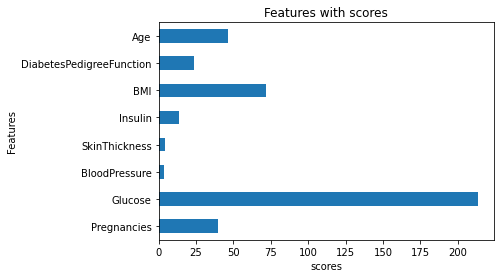

In [15]:
features = data_diabetes.columns[0:8]
new_df = pd.Series(features_a_f.scores_, features)
new_df.plot(kind = 'barh')
plt.ylabel("Features")
plt.xlabel("scores")
plt.title("Features with scores")
plt.show()

- Effective for numerical input and categorical output data.

### 1.3. Coorelation matrix with heatmap

- Find the linear relationship between two or more variable

- Variables need to be coorrelated with the targets but uncorrelated with each other.

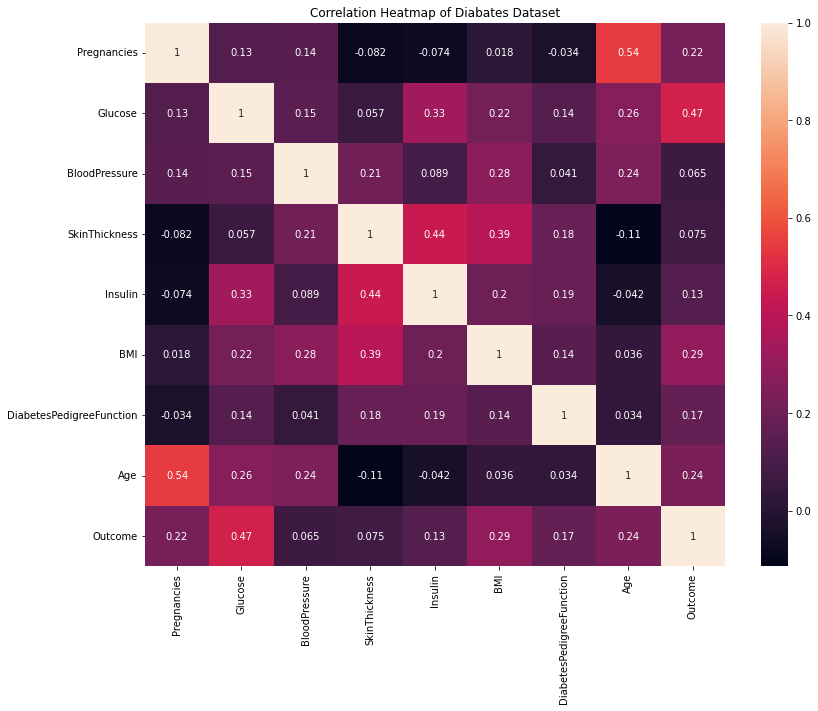

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (13, 10))
sns.heatmap(data_diabetes.corr(), annot = True)
plt.title('Correlation Heatmap of Diabates Dataset')
plt.show()

The feature correlation coefficient(r) has a range of -1 to 1.

- r= -1, high negative coorelation
- r= 0, no correlation
- r= 1, high positive correlation

### 1.4 Basic method

 #### 1.4.1 Recursive Feature Elimination

#### Removing constant feature

- Constant feature show the same value, single value for all observation in the dataset. 

- The constant features provide no information that is effective for a machine learning model to discriminate or predict a target.

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


from sklearn.feature_selection import VarianceThreshold
r_f_e = VarianceThreshold(threshold=0)
r_f_e.fit(X_train)

VarianceThreshold(threshold=0)

In [18]:
# if we sum over get_support, we get the number of features that are not constant
sum(r_f_e.get_support())

8

In [19]:
# print the constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[r_f_e.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[r_f_e.get_support()]]

0


[]

The considerable dataset doesn't contain any constant variable.

## 2. Wrapper Methods

- Wrapper method is based on specific Machine learning algorithm, that are implemented on the given dataset.
- The followings are the common wrapper method-
        - Forward selection
        - Backward Elimination
        - Exhaustive feature selection
        - Recursive feature elimination
        - Recursive feature elimination with cross-validation

#### 2.1. Forward selection

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((576, 8), (576,), (192, 8), (192,))

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [22]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlated_features = correlation(X_train, 0.7)
print('correlated features: ', len(set(correlated_features)) )

correlated features:  0


In [23]:
X_train.fillna(0, inplace=True)

/home/pinky/.local/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

s_f_s = SFS(RandomForestRegressor(), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=2)

s_f_s = s_f_s.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s finished

[2022-03-14 22:14:00] Features: 1/5 -- score: 0.010642770954569336[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s finished

[2022-03-14 22:14:01] Features: 2/5 -- score: 0.04307916867745132[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s finished

[2022-03-14 22:14:02] Features: 3/5 -- score: 0.11215804161990273[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [25]:
s_f_s.k_feature_idx_

(1, 4, 5, 6, 7)

In [26]:
X_train.columns[list(s_f_s.k_feature_idx_)]

Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

#### 2.2 Backward Elimination 

In [27]:
b_e = SFS(RandomForestRegressor(), 
           k_features=7, 
           forward=False, 
           floating=False, 
           verbose=8,
           scoring='r2',
           cv=3)

b_e = b_e.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.2s finished

[2022-03-14 22:14:06] Features: 7/7 -- score: 0.26967864914633677

In [28]:
b_e.k_feature_idx_


(0, 1, 2, 4, 5, 6, 7)

In [29]:
X_train.columns[list(b_e.k_feature_idx_)]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

rfe = RFE(SVC(kernel = 'linear'), n_features_to_select = 3)
rfe.fit(X_train, y_train)
pred = rfe.predict(X_test)
print("Accuracy : ", accuracy_score(pred, y_test))

Accuracy :  0.6979166666666666


## 3. Embedded method

- Two most popular Embedded mothod are
        - LASSO Regression
        - Random Forest

#### 3.1. LASSO Regularization

- LASSO regularization perform L2-regularization 

- Lasso regularisation helps to remove non-important features from the dataset.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

s_f_m = SelectFromModel(LogisticRegression(C = 5, penalty = 'l2',max_iter=1000))
s_f_m.fit(X_train, y_train)
important_features = X_train.columns[(s_f_m.get_support())] 
print(important_features)

Index(['DiabetesPedigreeFunction'], dtype='object')


- Effective for categorical input and numerical output data

#### 3.2 Random Forest 

- Random forest is highly effective for providing in a good predictive performance, low overfitting and easy interpretability.



In [32]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [33]:
r_clf = RandomForestClassifier(n_estimators=120, random_state=0)

In [34]:
r_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120, random_state=0)

In [35]:
# predicting on the test set
y_pred = r_clf.predict(X_test)

------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------